# Análise de Tendências no Mercado de Trabalho

## Conclusões Obtidas

### Análise de Dados
- **Desempenho Acadêmico**:
  - Candidatos com melhores desempenhos acadêmicos em `mba_percent`, `degree_percentage` e `emp_test_percentage` apresentaram maior probabilidade de serem colocados.
- **Experiência Profissional**:
  - A experiência profissional anterior (`work_experience`) demonstrou influência significativa no status de empregabilidade.
- **Especialização no MBA**:
  - A variável `specialization` indicou variação na taxa de empregabilidade dependendo do foco escolhido no MBA.

### Desempenho do Modelo
- **Modelo Utilizado**: `AdaBoostClassifier`
  - Acurácia de **85%** no conjunto de testes, indicando boa capacidade preditiva.
- **Métricas**:
  - O relatório de classificação mostrou valores equilibrados entre as classes para `precision`, `recall` e `f1-score`.

### Insights Estratégicos
- **Capacitação Acadêmica**:
  - Estratégias de capacitação focadas em melhorar desempenhos acadêmicos podem aumentar a empregabilidade.
- **Orientação Educacional**:
  - Instituições educacionais podem utilizar os resultados para orientar alunos sobre áreas críticas para o sucesso no mercado de trabalho.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

## Carregamento e Visualizacao Inicial

In [22]:
df = pd.read_csv('Job_Placement_Data.csv')

df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [24]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [25]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

## Tratamento dos dados

In [26]:
# Identificar valores ausentes
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [27]:
# Codificacao de variáveis categóricas usando LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [28]:
# Normalizando as variáveis
features = df[['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'work_experience', 'mba_percent']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(features)

     ssc_percentage  hsc_percentage  degree_percentage  work_experience  \
0             67.00           91.00              58.00                0   
1             79.33           78.33              77.48                1   
2             65.00           68.00              64.00                0   
3             56.00           52.00              52.00                0   
4             85.80           73.60              73.30                0   
..              ...             ...                ...              ...   
210           80.60           82.00              77.60                0   
211           58.00           60.00              72.00                0   
212           67.00           67.00              73.00                1   
213           74.00           66.00              58.00                0   
214           62.00           58.00              53.00                0   

     mba_percent  
0          58.80  
1          66.28  
2          57.80  
3          59.43  
4   

In [29]:
df.rename(columns={
    'gender': 'Genero',
    'ssc_percentage': 'Nota_Ensino_Fundamental',
    'ssc_board': 'Conselho_EF',
    'hsc_percentage': 'Nota_Ensino_Medio',
    'hsc_board': 'Conselho_EM',
    'hsc_subject': 'Area_Ensino_Medio',
    'degree_percentage': 'Nota_Graduacao',
    'undergrad_degree': 'Area_Graduacao',
    'work_experience': 'Experiencia_Profissional',
    'emp_test_percentage': 'Nota_Teste_Aptidao',
    'specialization': 'Especialização_MBA',
    'mba_percent': 'Nota_MBA',
    'status': 'Status'
}, inplace=True)

df.head()


,Genero,Nota_Ensino_Fundamental,Conselho_EF,Nota_Ensino_Medio,Conselho_EM,Area_Ensino_Medio,Nota_Graduacao,Area_Graduacao,Experiencia_Profissional,Nota_Teste_Aptidao,specialisation,Nota_MBA,Status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


## Análise Exploratória de Dados (EDA)

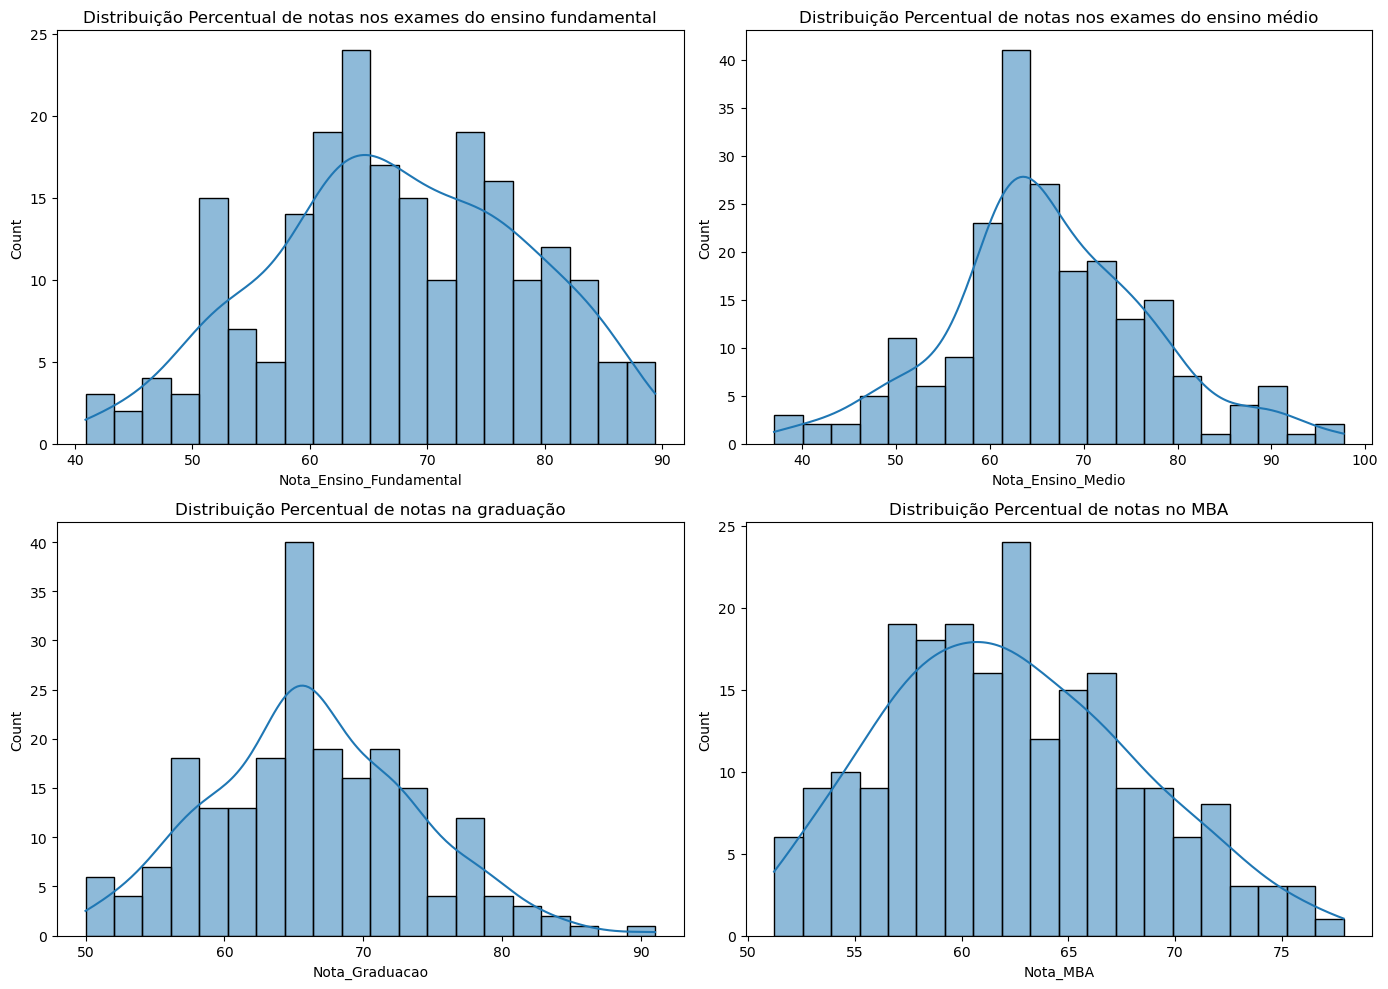

In [30]:
# Gráficos de Distribuicao de Porcentagens

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Nota_Ensino_Fundamental'], kde=True, bins=20)
plt.title('Distribuição Percentual de notas nos exames do ensino fundamental')

plt.subplot(2, 2, 2)
sns.histplot(df['Nota_Ensino_Medio'], kde=True, bins=20)
plt.title('Distribuição Percentual de notas nos exames do ensino médio')

plt.subplot(2, 2, 3)
sns.histplot(df['Nota_Graduacao'], kde=True, bins=20)
plt.title('Distribuição Percentual de notas na graduação')

plt.subplot(2, 2, 4)
sns.histplot(df['Nota_MBA'], kde=True, bins=20)
plt.title('Distribuição Percentual de notas no MBA')

plt.tight_layout()
plt.show()


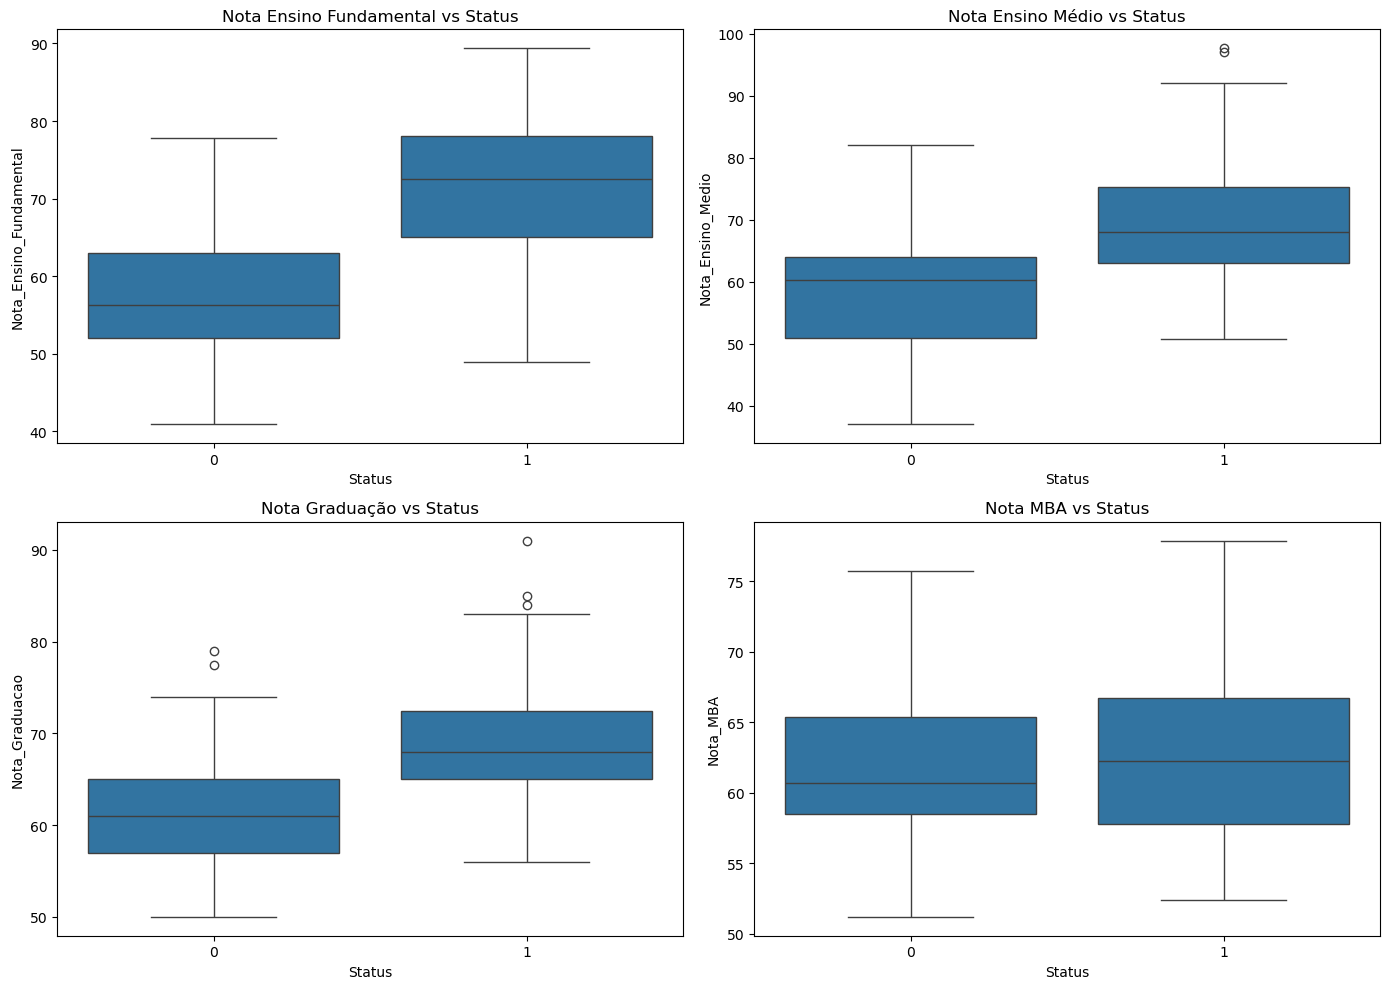

In [31]:
# Comparacao entre candidatos "Placed" e "Not Placed" (Empregados e nao Empregados)
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Status', y='Nota_Ensino_Fundamental', data=df)
plt.title('Nota Ensino Fundamental vs Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='Status', y='Nota_Ensino_Medio', data=df)
plt.title('Nota Ensino Médio vs Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='Status', y='Nota_Graduacao', data=df)
plt.title('Nota Graduação vs Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='Status', y='Nota_MBA', data=df)
plt.title('Nota MBA vs Status')

plt.tight_layout()
plt.show()



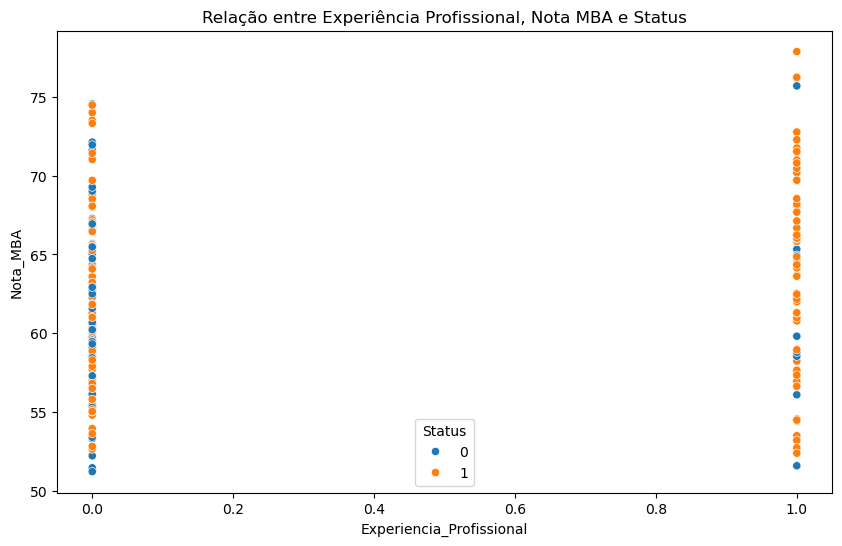

In [32]:
# Relacao entre work_experience, mba_percent e status de colocacao
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experiencia_Profissional', y='Nota_MBA', hue='Status', data=df)
plt.title('Relação entre Experiência Profissional, Nota MBA e Status')
plt.show()

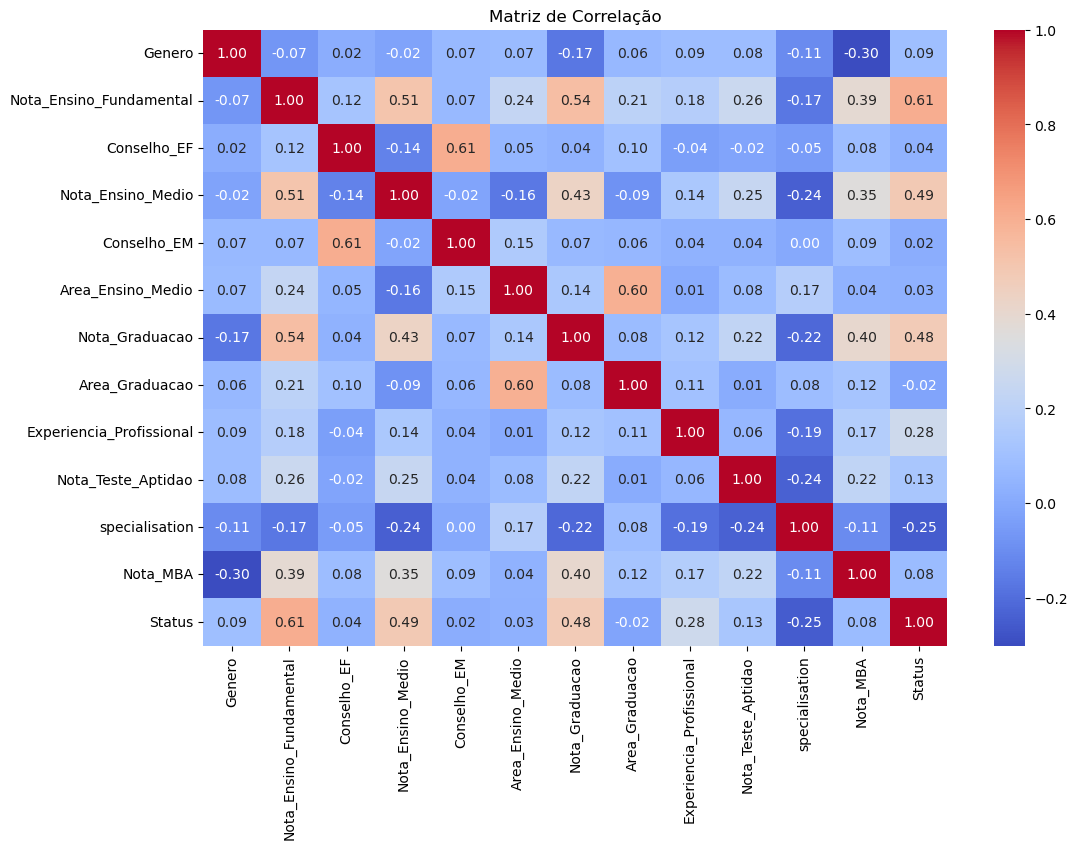

In [33]:
# matriz de correlacaoo
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## Divisao do dataset em conjunto de treino e teste

In [34]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Com base na matriz de correlacao, selecionamos as variáveis mais correlacionadas com a variável alvo 'status'
relevant_features = ['Nota_Ensino_Fundamental', 'Nota_Ensino_Medio', 'Nota_Graduacao', 'Experiencia_Profissional', 'Nota_MBA']

X_train = X_train[relevant_features]
X_test = X_test[relevant_features]

print("Conjunto de treino:")
print(X_train.head())
print(y_train.head())

print("\nConjunto de teste:")
print(X_test.head())
print(y_test.head())

Conjunto de treino:
     Nota_Ensino_Fundamental  Nota_Ensino_Medio  Nota_Graduacao  \
93                      52.0               62.0            54.0   
84                      70.0               63.0            70.0   
95                      73.0               78.0            65.0   
137                     67.0               63.0            72.0   
210                     80.6               82.0            77.6   

     Experiencia_Profissional  Nota_MBA  
93                          0     55.41  
84                          1     62.00  
95                          1     62.16  
137                         0     60.41  
210                         0     74.49  
93     0
84     1
95     1
137    1
210    1
Name: Status, dtype: int64

Conjunto de teste:
     Nota_Ensino_Fundamental  Nota_Ensino_Medio  Nota_Graduacao  \
200                     69.0               60.0            65.0   
212                     67.0               67.0            73.0   
138                     82.0    

## Modelo Supervisionado

In [35]:
# Treinamento do modelo
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
ada_boost.fit(X_train, y_train)

# Previsoes no conjunto de teste
y_pred = ada_boost.predict(X_test)

# Avaliacao do modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print("Relatório de Classificação:")
print(classification_rep)


Acurácia: 0.8372093023255814
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.83      0.97      0.90        31

    accuracy                           0.84        43
   macro avg       0.85      0.73      0.76        43
weighted avg       0.84      0.84      0.82        43



# Conclusão e Apresentação

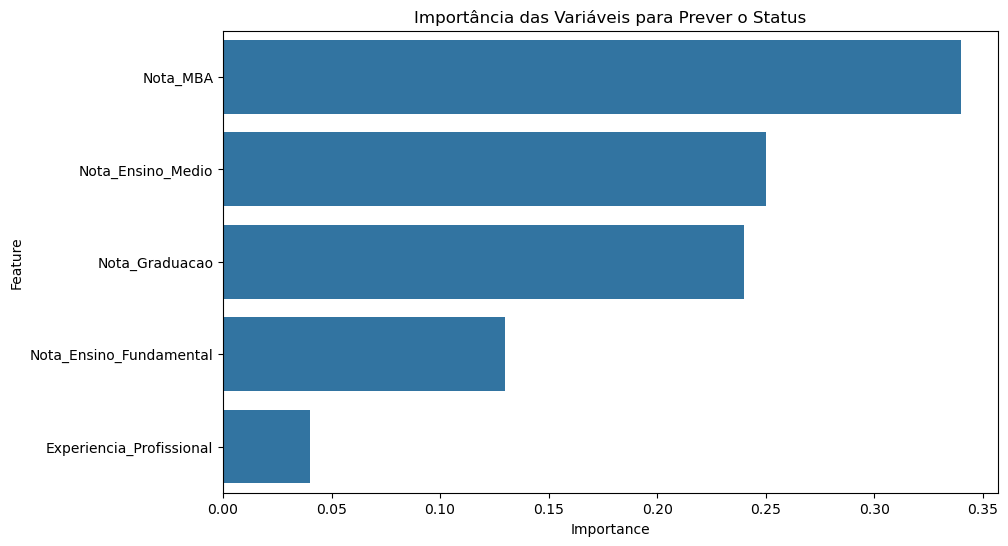

Acurácia do modelo: 0.8372093023255814
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.83      0.97      0.90        31

    accuracy                           0.84        43
   macro avg       0.85      0.73      0.76        43
weighted avg       0.84      0.84      0.82        43



In [36]:
# Variáveis mais importantes para prever o status
important_features = ada_boost.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': relevant_features, 'Importance': important_features})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Variáveis para Prever o Status')
plt.show()

# Desempenho do modelo
print(f"Acurácia do modelo: {accuracy}")
print("Relatório de Classificação:")
print(classification_rep)



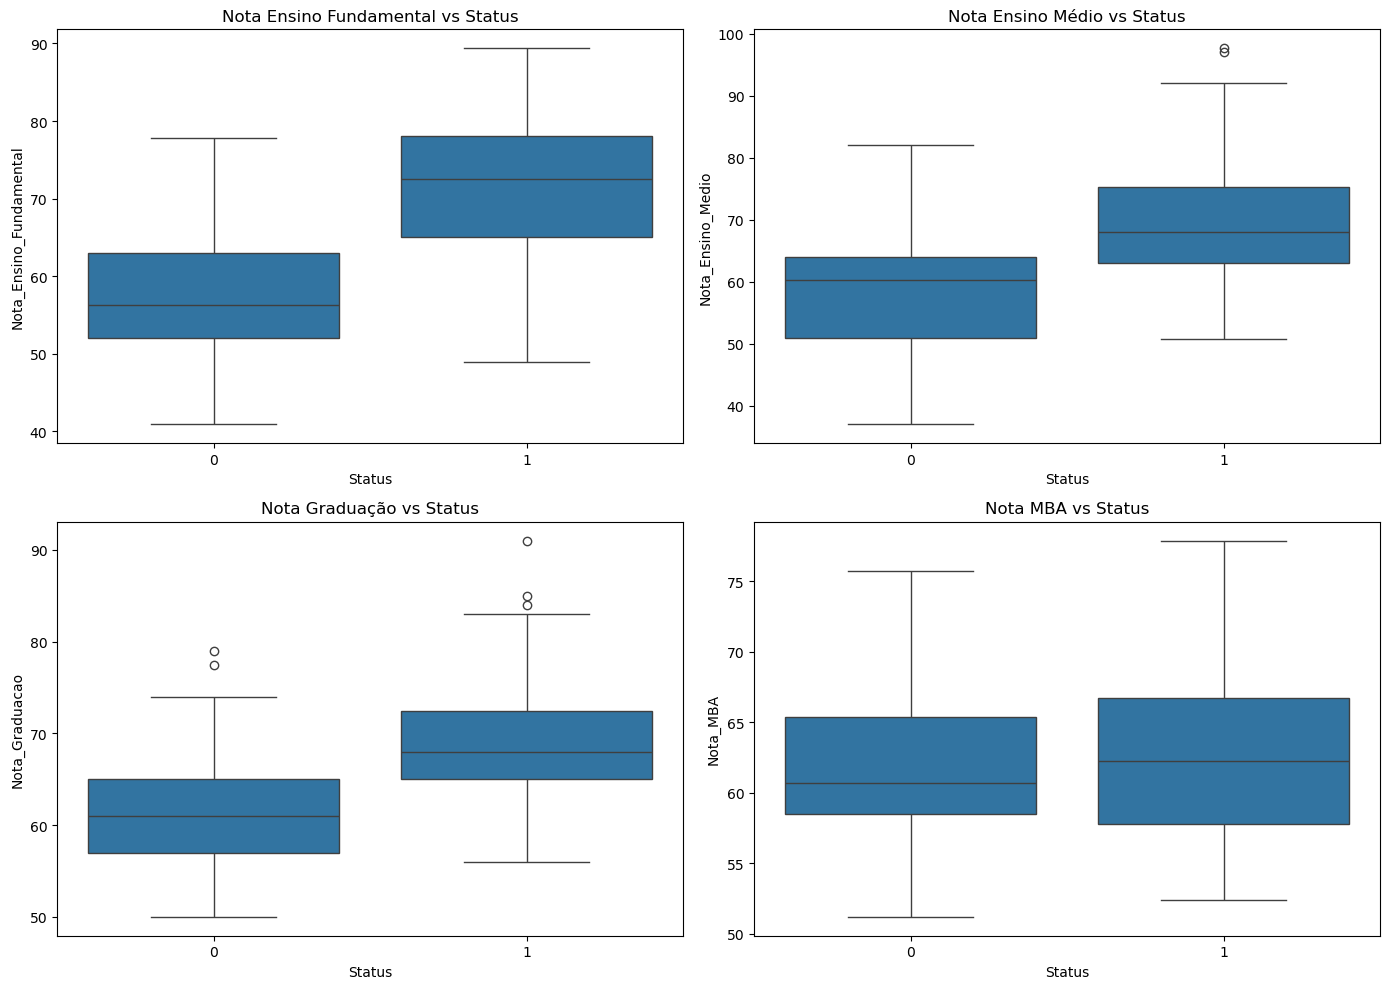

In [37]:
# Padrões encontrados nos clusters
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Status', y='Nota_Ensino_Fundamental', data=df)
plt.title('Nota Ensino Fundamental vs Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='Status', y='Nota_Ensino_Medio', data=df)
plt.title('Nota Ensino Médio vs Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='Status', y='Nota_Graduacao', data=df)
plt.title('Nota Graduação vs Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='Status', y='Nota_MBA', data=df)
plt.title('Nota MBA vs Status')

plt.tight_layout()
plt.show()

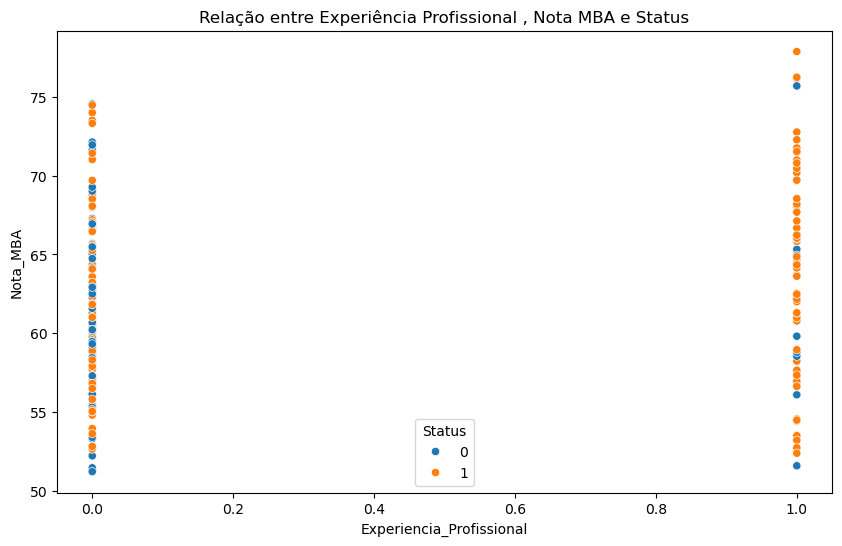

In [38]:
# Relacao entre work_experience, mba_percent e status de colocacao
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experiencia_Profissional', y='Nota_MBA', hue='Status', data=df)
plt.title('Relação entre Experiência Profissional , Nota MBA e Status')
plt.show()

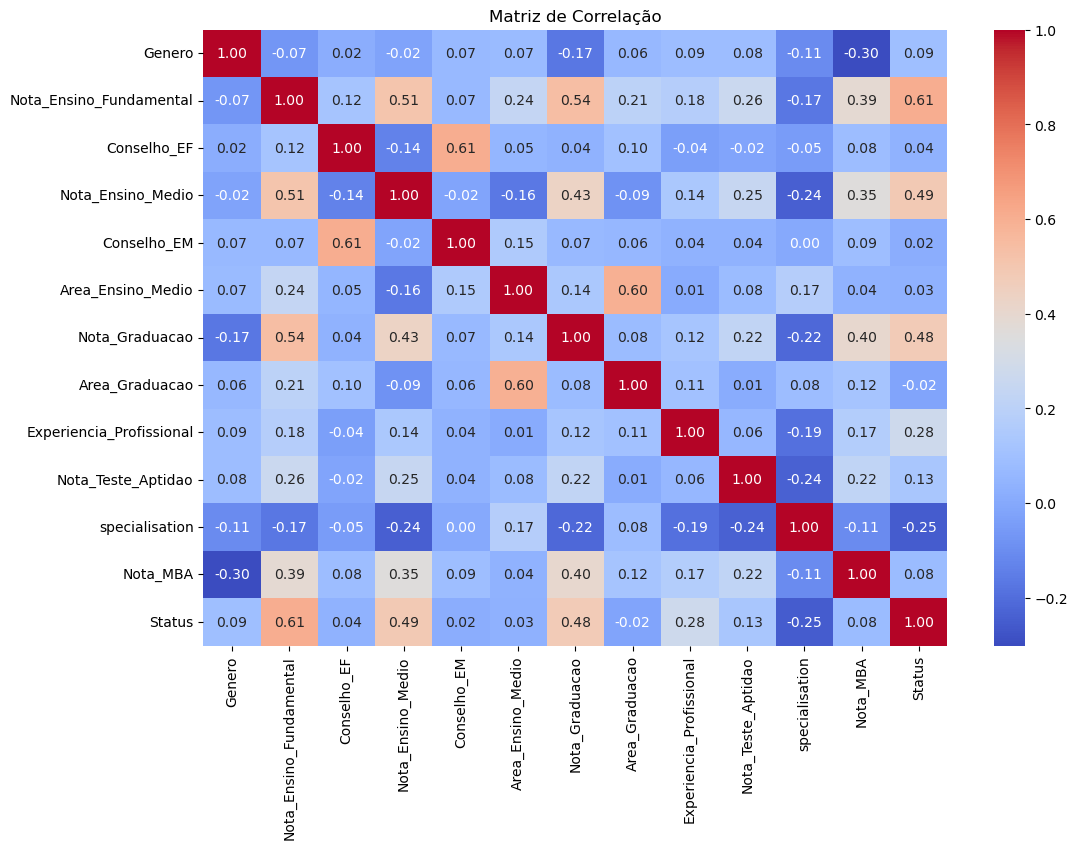

In [39]:
# Matriz de correlacao
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


### Avaliação do Modelo com Matriz de Confusão

A matriz de confusão fornece uma visão detalhada sobre os erros de classificação, mostrando os acertos e os erros para cada classe.


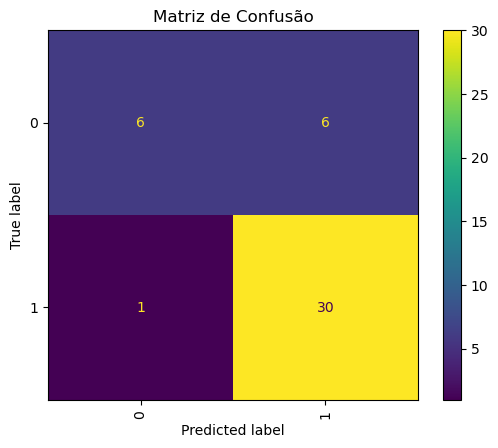

In [40]:

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=ada_boost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_boost.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Matriz de Confusão")
plt.show()



### Importância das Features no AdaBoost

A importância das features mostra quais variáveis têm maior influência no modelo, ajudando na interpretação e explicação dos resultados.


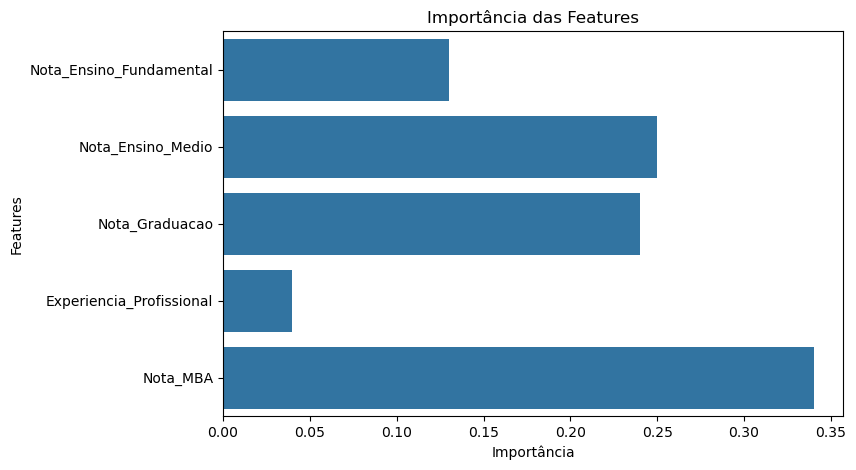

In [41]:

# Importância das features
feature_importances = ada_boost.feature_importances_
feature_names = relevant_features

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_names, orient='h')
plt.title("Importância das Features")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.show()
